In [1]:
import pandas as pd
df_chat = pd.read_csv("Chatbot_val_v2.csv", index_col="Unnamed: 0")
df_gemma = pd.read_csv("gemma_val.csv", index_col="Unnamed: 0")

In [2]:
import re
import ast

res_lst = []
for i in range(len(df_chat)):
    # initializing string
    test_str = df_chat["metrics"][i]

    # define regular expression pattern to match dictionary literals
    pattern = r"{[^{}]+}"

    # find all matches of dictionary literals in input string
    matches = re.findall(pattern, test_str)

    # use ast.literal_eval() to convert each matched string to a dictionary object
    res = [ast.literal_eval(match) for match in matches]
    res_lst.append(res)
df_chat = pd.DataFrame(
    {"metrics": res_lst}
)

res_lst = []
for i in range(len(df_gemma)):
    # initializing string
    test_str = df_gemma["metrics"][i]

    # define regular expression pattern to match dictionary literals
    pattern = r"{[^{}]+}"

    # find all matches of dictionary literals in input string
    matches = re.findall(pattern, test_str)

    # use ast.literal_eval() to convert each matched string to a dictionary object
    res = [ast.literal_eval(match) for match in matches]
    res_lst.append(res)
df_gemma = pd.DataFrame(
    {"metrics": res_lst}
)

In [55]:
max_len=0
ind = 0
for i in range(len(df_gemma["metrics"])):
    x = len(df_gemma["metrics"][i][0])
    if x>max_len:
        max_len = x
        ind = i

In [4]:
len_total = []
for i in range(len(df_gemma["metrics"])):
    x = len(df_gemma["metrics"][i][0])
    leni = x
    ind = i
    len_total.append(leni)

In [11]:
sum(len_total)

1635

In [13]:
chat_metrics={}
for chat in range(13):
    chat_metrics[str(chat+1)] = 0

gemma_metrics={}
for chat in range(13):
    gemma_metrics[str(chat+1)] = 0

In [14]:
from statistics import mean
for row in df_chat["metrics"]:
    for key, value in row[0].items():
        for key2, value2 in chat_metrics.items():
            if key == key2:
                if value == None:
                    break
                if value2 == 0:
                    chat_metrics[key] = value
                else:
                    mean_me = mean([value,value2])
                    chat_metrics[key] = mean_me
                break
            else:
                continue

for row in df_gemma["metrics"]:
    for key, value in row[0].items():
        for key2, value2 in gemma_metrics.items():
            if key == key2:
                if value == None:
                    break
                if value2 == 0:
                    gemma_metrics[key] = value
                else:
                    mean_me = mean([value,value2])
                    gemma_metrics[key] = mean_me
                break
            else:
                continue

In [15]:
mean(chat_metrics.values())
mean(gemma_metrics.values())

0.5742518208036526

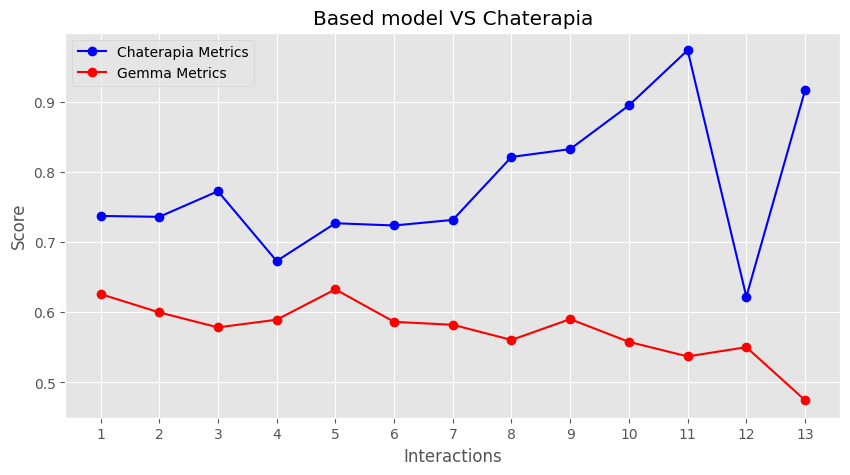

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico
plt.plot(chat_metrics.keys(), chat_metrics.values(), label='Chaterapia Metrics', color='blue', linestyle='-', marker='o')
plt.plot(gemma_metrics.keys(), gemma_metrics.values(), label='Gemma Metrics', color='red', linestyle='-', marker='o')

plt.title('Based model VS Chaterapia')  # Título del gráfico
plt.xlabel('Interactions')  # Etiqueta del eje X
plt.ylabel('Score')  # Etiqueta del eje Y
plt.legend()  # Añade una leyenda

plt.grid(True)  # Añade una cuadrícula
plt.style.use('ggplot')  # Utiliza un estilo de fondo

plt.show()

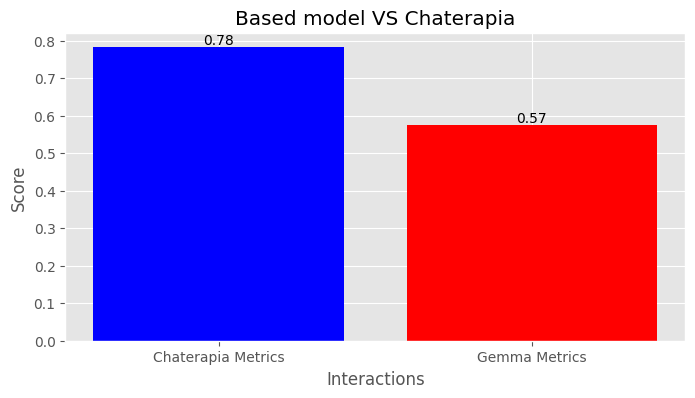

In [24]:
# Valores a graficar (debes calcular estos valores con tus datos reales)
values = [mean(chat_metrics.values()), mean(gemma_metrics.values())]
categories = ['Chaterapia Metrics', 'Gemma Metrics']

plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico

# Crear gráfico de barras con colores personalizados
bars = plt.bar(categories, values, color=['blue', 'red'])

# Añadir título y etiquetas
plt.title('Based model VS Chaterapia')  # Título del gráfico
plt.xlabel('Interactions')  # Etiqueta del eje X
plt.ylabel('Score')  # Etiqueta del eje Y

# Añadir valores sobre cada barra para claridad
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mejorar el estilo
plt.style.use('ggplot')

# Mostrar el gráfico
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convertir los diccionarios a DataFrame
data = pd.DataFrame({
    'Date': list(chat_metrics.keys()) + list(gemma_metrics.keys()),
    'Value': list(chat_metrics.values()) + list(gemma_metrics.values()),
    'Source': ['Chat'] * len(chat_metrics) + ['Gemma'] * len(gemma_metrics)
})

# Convertir la columna de fecha a tipo datetime para mejor manejo en gráficos
data['Date'] = pd.to_datetime(data['Date'])

# Crear el gráfico
sns.set(style="whitegrid")  # Estilo de fondo con cuadrícula blanca
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.lineplot(data=data, x='Date', y='Value', hue='Source', marker='o')  # Crear el gráfico de líneas
plt.title('Comparación de Métricas Chat vs Gemma')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Valor')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor lectura
plt.show()

ValueError: Given date string 1 not likely a datetime present at position 0